In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [71]:
city = 'medellin'
date = 'ag14'

In [72]:
time = pd.read_csv( './data/meta/time.csv' )

In [73]:
time[ 'date' ] = pd.to_datetime( time[ 'date' ], format = '%d/%m/%Y' )

In [74]:
time.dtypes

date    datetime64[ns]
time             int64
dtype: object

In [75]:
time.tail()

,date,time
163,2020-08-24,164
164,2020-08-25,165
165,2020-08-26,166
166,2020-08-27,167
167,2020-08-28,168


In [76]:
filename = ''
if city == 'bogota':
    filename = 'BOG'
elif city == 'barranquilla':
    filename = 'BQUILLA'
elif city == 'cali':
    filename = 'CALI'
elif city == 'medellin':
    filename = 'MED'
elif city == 'cartagena':
    filename = 'CART'
    
meta = pd.read_csv( './data/meta/{}{}.csv'.format( filename, date ) )

In [77]:
meta.shape

(1540, 11)

In [78]:
meta.dtypes

replicate      int64
time           int64
S            float64
E            float64
A            float64
I1           float64
I2           float64
I3           float64
R            float64
D            float64
obs          float64
dtype: object

In [79]:
meta.tail( 20 )

,replicate,time,S,E,A,I1,I2,I3,R,D,obs
1520,10,134,1.539068e+06,186257.136681,38786.417758,183754.720633,1172.247536,370.929738,420191.361731,260.808532,256.0
1521,10,135,1.498791e+06,189001.815964,39824.577600,188673.111729,1218.959713,389.828586,442871.448955,279.826097,298.0
1522,10,136,1.458420e+06,191332.129989,40809.557650,193339.557987,1265.460600,409.041601,466137.384786,299.796631,317.0
1523,10,137,1.418063e+06,193225.788395,41734.446234,197721.314621,1311.556468,428.524888,489956.652233,320.734765,346.0
1524,10,138,1.377828e+06,194664.302457,42592.571461,201786.772852,1357.044755,448.229736,514292.813117,342.652815,347.0
1525,10,139,1.337821e+06,195633.356955,43377.601017,205505.932679,1401.715898,468.102725,539105.673388,365.560543,396.0
1526,10,140,1.298147e+06,196123.120406,44083.638634,208850.859913,1445.355395,488.085901,564351.505716,389.464922,388.0
1527,10,141,1.258909e+06,196128.451298,44705.314515,211796.114580,1487.745988,508.117029,589983.321561,414.369925,388.0
1528,10,142,1.220202e+06,195649.019435,45237.872997,214319.166222,1528.670051,528.129934,615951.199921,440.276312,424.0
1529,10,143,1.182120e+06,194689.328080,45677.250102,216400.761324,1567.912087,548.054917,642202.664549,467.181445,465.0


In [80]:
def ci( x ):
    try:
        return 1.96 * np.std( x ) / np.sqrt( len( x ) )
    except ZeroDivisionError:
        return 0

meta_grouped = meta.groupby( 'time' ).agg( { 'obs': [ 'mean', ci ] } ).reset_index().fillna( 0 )
meta_grouped.columns = [ '_'.join( col ).strip() for col in meta_grouped.columns.values ]
meta_grouped.rename( columns = { 'time_': 'time' }, inplace = True )

In [81]:
meta_grouped = meta_grouped.merge( time, how = 'left', on = 'time' )

In [82]:
meta_grouped = meta_grouped.loc[ meta_grouped[ 'date' ].notnull() ]

In [83]:
meta_grouped[ 'obs_lower' ] = meta_grouped[ 'obs_mean' ] - meta_grouped[ 'obs_ci' ]
meta_grouped[ 'obs_upper' ] = meta_grouped[ 'obs_mean' ] + meta_grouped[ 'obs_ci' ]

In [84]:
meta_grouped.head()

,time,obs_mean,obs_ci,date,obs_lower,obs_upper
1,1,0.0,0.0,2020-03-14,0.0,0.0
2,2,0.0,0.0,2020-03-15,0.0,0.0
3,3,0.0,0.0,2020-03-16,0.0,0.0
4,4,0.0,0.0,2020-03-17,0.0,0.0
5,5,0.0,0.0,2020-03-18,0.0,0.0


In [85]:
meta_grouped.tail()

,time,obs_mean,obs_ci,date,obs_lower,obs_upper
149,149,648.7,14.453721,2020-08-09,634.246279,663.153721
150,150,679.0,14.570066,2020-08-10,664.429934,693.570066
151,151,709.2,22.319573,2020-08-11,686.880427,731.519573
152,152,754.0,12.629459,2020-08-12,741.370541,766.629459
153,153,782.6,12.209400,2020-08-13,770.390600,794.809400


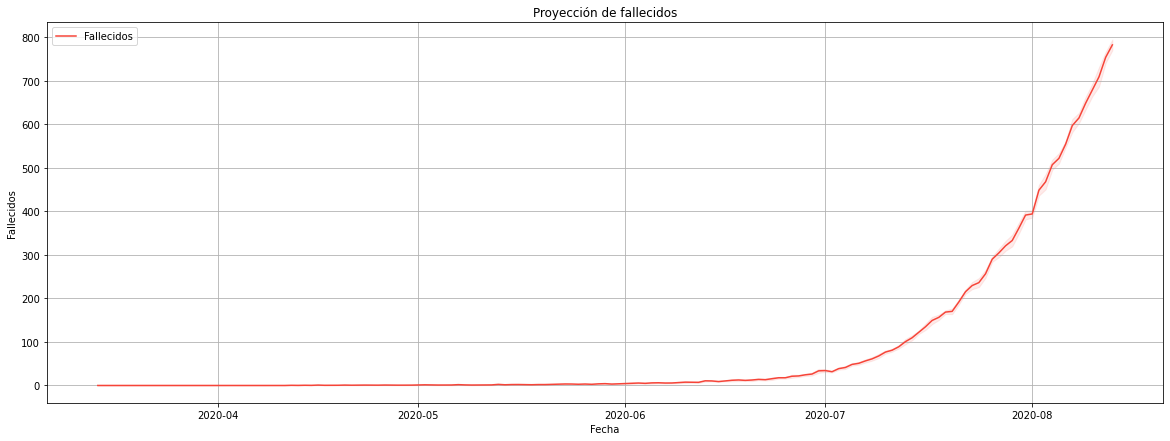

In [86]:
fig, ax = plt.subplots( figsize = ( 20, 7 ) )

ax.plot( meta_grouped[ 'date' ], meta_grouped[ 'obs_mean' ], label = 'Fallecidos', color = '#f64438' )
ax.fill_between( meta_grouped[ 'date' ], meta_grouped[ 'obs_lower' ], meta_grouped[ 'obs_upper' ], color = '#f64438', alpha = .1 )

plt.title( 'Proyección de fallecidos' )
plt.xlabel( 'Fecha' )
plt.ylabel( 'Fallecidos' )
plt.grid( True )
plt.legend()

In [87]:
meta_grouped.to_csv( './data/meta/seir_{}.csv'.format( city ), index = False )